In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from rna_folding.base_pairing import BasePairing
from rna_folding.mapping_functions import nussinov



In [10]:
# Load data
bp2_gt_per_ph = pickle.load(open("../experiments/RNA12/suboptimal2_same_randomranking_compare_to_ref/bp_graph2/analysis/gt_per_ph.pickle", "rb"))
bp2_ph_per_gt = pickle.load(open("../experiments/RNA12/suboptimal2_same_randomranking_compare_to_ref/bp_graph2/analysis/ph_per_gt.pickle", "rb"))

bp7_gt_per_ph = pickle.load(open("../experiments/RNA12/suboptimal2_same_randomranking_compare_to_ref/bp_graph7/analysis/gt_per_ph.pickle", "rb"))
bp7_ph_per_gt = pickle.load(open("../experiments/RNA12/suboptimal2_same_randomranking_compare_to_ref/bp_graph7/analysis/ph_per_gt.pickle", "rb"))

# sort based on dict values
bp2_sorted_genotypes_by_phenotypes = sorted(bp2_ph_per_gt.items(), key=lambda x:x[1])
bp7_sorted_genotypes_by_phenotypes = sorted(bp7_ph_per_gt.items(), key=lambda x:x[1])

with open("../experiments/RNA12/suboptimal2_same_randomranking_compare_to_ref/phenotype_ranking1.txt", "r") as f:
    phenotype_ranking = [line.strip() for line in f]

In [3]:
genotypes = np.loadtxt("../experiments/RNA12/suboptimal2_same_randomranking_compare_to_ref/genotypes.txt", dtype="str")

In [4]:
# Find one where 2 is below 10 and 7 is above 50
below10_above50 = []
# Find one where 2 and 7 are between 25 and 50
between25_50_between25_50 = []
# find one where 2 and 7 are identical and above 5
above5_identical = []

for gt in bp2_ph_per_gt:
    if bp2_ph_per_gt[gt] > 25 and bp2_ph_per_gt[gt] > 50 and bp7_ph_per_gt[gt] > 25 and bp7_ph_per_gt[gt] > 50:
        between25_50_between25_50.append(int(gt))
    if bp2_ph_per_gt[gt] < 10 and bp7_ph_per_gt[gt] > 50:
        below10_above50.append(int(gt))
    if bp2_ph_per_gt[gt] > 5 and bp2_ph_per_gt[gt] == bp7_ph_per_gt[gt]:
        above5_identical.append(int(gt))


In [5]:
# Set up the functions for nussinov gp mapping with bp_rule 7 and 2
alphabet = "JKLM"
graph_path = "/home/lgold/phd/research/projects/connectivity/rna_folding/data/graphs/"
min_loop_size = 3
suboptimal = 2
structures_max = 1000

# import gp map data
bp7_pairing = BasePairing(bases=alphabet,
                      graph_path=graph_path, 
                      id=7)
bp2_pairing = BasePairing(bases=alphabet,
                      graph_path=graph_path, 
                      id=2)
    

bp7_mapper = lambda seq: nussinov(seq, 
                                base_pairing=bp7_pairing, 
                                min_loop_size=min_loop_size, 
                                suboptimal=suboptimal,
                                structures_max=structures_max)
                            
bp2_mapper = lambda seq: nussinov(seq, 
                                base_pairing=bp2_pairing, 
                                min_loop_size=min_loop_size, 
                                suboptimal=suboptimal,
                                structures_max=structures_max)


In [6]:
# get the nussinov gp mapping for 10 random candidate genotypes.
np.random.seed(64066)
n_genotypes = 10

bp7_gp_map = {}
bp2_gp_map = {}
subset_gts = []
subset_gts_num = []

for i in np.random.randint(0, len(below10_above50), size=n_genotypes):
    subset_gts_num.append(below10_above50[i])
    gt = genotypes[below10_above50[i]]
    subset_gts.append(gt)

    bp7_gp_map[gt] = bp7_mapper(gt)
    bp2_gp_map[gt] = bp2_mapper(gt)
    print(gt, len(bp7_gp_map[gt]), len(bp2_gp_map[gt]))

JJMMJMKKJKLL 67 5
MMJJKKMKMLMK 54 7
MLKKLJJKMJJM 51 9
LMJKLJLLLJJJ 68 5
LJLMLMJJLMJL 51 7
LJKMLLJJMJML 53 9
LMKKKMMJMJMJ 70 9
KMKKKKMMMJKK 52 2
KLLLJMMMLMJJ 51 9
LLJLKJMJLMLJ 58 5


In [7]:
print("Genotype\tNumber of ph. bp7\tNumber of ph. bp2")
for gt_id, gt in zip(subset_gts_num, subset_gts):
    print(gt, "\t", bp7_ph_per_gt[str(gt_id)], "\t", bp2_ph_per_gt[str(gt_id)])

Genotype	Number of ph. bp7	Number of ph. bp2
JJMMJMKKJKLL 	 67 	 5
MMJJKKMKMLMK 	 54 	 7
MLKKLJJKMJJM 	 51 	 9
LMJKLJLLLJJJ 	 68 	 5
LJLMLMJJLMJL 	 51 	 7
LJKMLLJJMJML 	 53 	 9
LMKKKMMJMJMJ 	 70 	 9
KMKKKKMMMJKK 	 52 	 2
KLLLJMMMLMJJ 	 51 	 9
LLJLKJMJLMLJ 	 58 	 5


In [8]:
# print db
gt = "LLJLKJMJLMLJ"
print("Phenotype list\nbp_7\tbp_2")
for i in range(len(bp7_gp_map[gt])):
    ph_bp7 = bp7_gp_map[gt][i]
    try:
        ph_bp2 = bp2_gp_map[gt][i]
    except IndexError:
        ph_bp2 = ""
    print(ph_bp7, "\t", ph_bp2)
    print(gt, "\t", gt)
    

# visualize db (e.g. with forna?)

Phenotype list
bp_7	bp_2
.(...)(....) 	 ......(....)
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
(....)(....) 	 .....(...)..
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
......(....) 	 ..(......)..
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
...(.(....)) 	 ..(...).....
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
...(.(...).) 	 ............
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
...((....).) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
...(.......) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.(...(....)) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.((..(...))) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.((.(....))) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.(((...)..)) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.((.......)) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.(...(...).) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.(..(....).) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.(((...).).) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.((......).) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.(((...))..) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.((.....)..) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.(.(...)...) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.((...)....) 	 
LLJLKJMJLMLJ 	 LLJLKJMJLMLJ
.(.........) 	 
LLJLKJMJLMLJ 	 LLJL

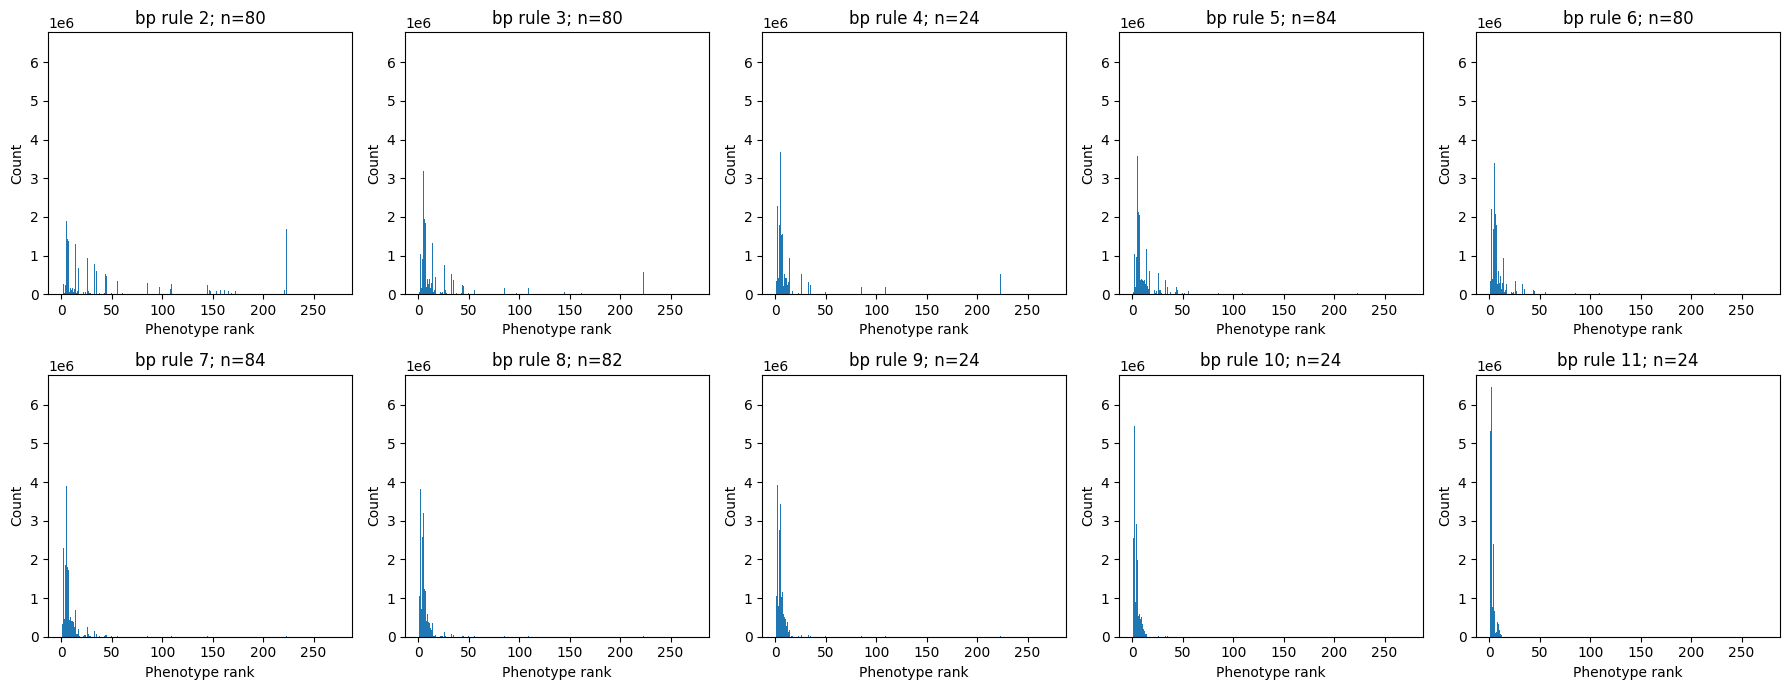

In [41]:
cols = 5
rows = 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 7), sharey=True, sharex=True)

for i in range(10):
    rank_counts = []
    with open(f"../experiments/RNA12/suboptimal2_same_randomranking_compare_to_ref/bp_graph{i+2}/ranking1/gp_map.txt", "r") as f:
        for line in f:
            l = line.strip().split(" ")
            rank_counts.append(len(l) - 1)

        ax = axes[i//cols][i%cols]
        ax.bar(np.arange(1, len(rank_counts)+1), rank_counts)
        ph_count = len(np.where(np.array(rank_counts) > 0)[0])
        ax.title.set_text(f"bp rule {i+2}; n={ph_count}")
        ax.yaxis.set_tick_params(labelbottom=True)
        ax.xaxis.set_tick_params(labelbottom=True)
        ax.set_xlabel("Phenotype rank")
        ax.set_ylabel("Count")

plt.tight_layout()